In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', unicode_minus=False)

In [27]:
# user_data = pd.read_csv('./user_spec.csv')
# loan_table = pd.read_csv('./loan_result.csv')
# log_data = pd.read_csv('./log_data.csv')
merge_data = pd.read_pickle('./new_split/merge_df.pkl')

In [29]:
loan_table.shape

(13527363, 7)

In [3]:
len(loan_table.bank_id.unique())

63

In [9]:
loan_table.bank_id.unique().max()

64

In [10]:
len(loan_table.product_id.unique())

AttributeError: 'int' object has no attribute 'max'

In [11]:
loan_table.product_id.unique().max()

270

In [6]:
loan_table[['bank_id', 'product_id']].value_counts()

bank_id  product_id
35       29            285082
1        61            283699
59       150           278308
33       110           267874
32       56            246127
                        ...  
30       64                 2
3        53                 2
36       55                 2
24       211                1
49       225                1
Length: 188, dtype: int64

In [170]:
user_data.isna().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

In [171]:
loan_table.isna().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                  7495
loan_rate                   7495
is_applied               3257239
dtype: int64

In [172]:
log_data.isna().sum()

user_id                0
event                  0
timestamp              0
mp_os                980
mp_app_version    660597
date_cd                0
dtype: int64

In [13]:
train_df = pd.read_pickle('./final_data/real_train.pkl')
train_df.head()

,credit_score,yearly_income,desired_amount,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,employment_period,age,income_type_EARNEDINCOME2,...,gender,insert_time,month,day,gen_age_nan,credit_nan,amt_nan,period_nan,age_cat,bank_apply_prop
68377,650.0,40000000.0,20000000.0,0,0,4.0,54000000.0,890.0,33.0,0,...,1.0,2022-03-09 17:18:02,3,9,False,False,False,False,3,0.046390
68378,650.0,40000000.0,20000000.0,0,0,4.0,54000000.0,890.0,33.0,0,...,1.0,2022-03-09 17:18:02,3,9,False,False,False,False,3,0.064755
68379,650.0,40000000.0,20000000.0,0,0,4.0,54000000.0,890.0,33.0,0,...,1.0,2022-03-09 17:18:02,3,9,False,False,False,False,3,0.068810
68380,650.0,40000000.0,20000000.0,0,0,4.0,54000000.0,890.0,33.0,0,...,1.0,2022-03-09 17:18:02,3,9,False,False,False,False,3,0.001962
68381,650.0,40000000.0,20000000.0,0,0,4.0,54000000.0,890.0,33.0,0,...,1.0,2022-03-09 17:18:02,3,9,False,False,False,False,3,0.091395


In [23]:
train_df.age_cat

68377       3
68378       3
68379       3
68380       3
68381       3
           ..
13519552    4
13519553    4
13519554    4
13519555    4
13519556    4
Name: age_cat, Length: 10229990, dtype: int64

## user_spec

#### 유저스펙테이블
- application_id : 신청서 번호
- user_id : 유저 번호
- birth_year : 유저 생년월일
- gender : 유저 성별
- insert_time : 생성일시
- credit_score : 한도조회 당시 유저 신용점수 (10점 단위 올림)
- yearly_income : 연소득 (100만 단위 반올림)
- income_type : 근로형태
- company_enter_month : 입사연월
- employment_type : 고용형태
- houseown_type : 주거소유형태
- desired_amount : 대출희망금액 (100만단위 반올림)
- purpose : 대출 목적
- personal_rehabilitation_yn : 개인회생자 여부
- personla_rehabilitation_complete_yn : 개인회생자 납입 완료 여부
- national_health_insurance_type : 건강보험 타입
- existing_loan_cnt : 기대출수
- existing_loan_amt : 기대출금액

* 개인회생제도 : 재정적 어려움으로 인하여 파탄에 직면하고 있는 개인채무자로서 장래 계속적으로 또는 반복하여 수입을 얻을 가능성이 있는 자에 대하여 채권자 등 이해관계인의 법률관계를 조정함으로써 채무자의 효율적 회생과 채권자의 이익을 도모하기 위하여 마련된 절차로서, 2004. 9. 23.부터 시행하게 되었습니다. 즉 개인회생제도란, 총 채무액이 무담보채무의 경우에는 10억원, 담보부채무의 경우에는 15억원 이하인 개인채무자로서 장래 계속적으로 또는 반복하여 수입을 얻을 가능성이 있는 자가 3년간(채무자 회생 및 파산에 관한 법률 제611조 제5항 단서의 경우 5년) 일정한 금액을 변제하면 나머지 채무의 면제를 받을 수 있는 절차

* 빚을 졌는데 갚을 능력이 없음. -> 나라에 회생을 신청 -> 나라에서 보증을 서주는 것. -> 어떻게 갚을 건지에 대한 증명을 해야 함. 

- user_id - total_list

In [173]:
user_id = list(user_data.application_id.unique())
total_list = list(loan_table.application_id.unique())

In [174]:
len(set(user_id).intersection(total_list))

968753

In [175]:
len(set(user_id).difference(total_list))

425463

- user_data 살펴보기

In [176]:
# company_enter_month 변수 전처리 : datetime으로 형 변환

def cem_var_preproc(x):
    if len(str(x)) == 10:
        return str(x)[:6] + '01'
    elif len(str(x)) == 8:
        return str(x)[:6] + '01'
    elif str(x) == 'nan':
        return np.nan
    else: 
        print(x)
        return x

user_data['company_enter_month'] = pd.to_datetime(user_data['company_enter_month'].apply(cem_var_preproc))

In [177]:
# insert_time 변수 전처리 : datetime 형변환
user_data['insert_time'] = pd.to_datetime(user_data['insert_time'])

In [178]:
# 근무기간(employment period 변수 추가) : insert_time - company_enter_month
# company_enter_month 변수 대신 사용할 예정
user_data['employment_period'] = (user_data['insert_time'] - user_data['company_enter_month']).dt.days

In [257]:
# age = insert_time - birth_year
user_data['age'] = user_data['insert_time'].dt.year - user_data['birth_year']

In [271]:
print('대출 신청 인원: ', len(set(user_data[user_data['age'] < 19].application_id.unique()).intersection(total_list)))
user_data[user_data['age'] < 19].head()

대출 신청 인원:  0


,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,employment_period,age
30254,476193,461618,2004.0,1.0,2022-06-25 20:18:59,710.0,0.0,OTHERINCOME,NaT,기타,전월세,5.000000e+06,생활비,0.0,NaN,1.0,NaN,NaN,18.0
41938,1614171,779084,2004.0,1.0,2022-05-07 19:09:07,750.0,2000000.0,OTHERINCOME,NaT,기타,기타가족소유,1.000000e+06,기타,0.0,NaN,1.0,NaN,NaN,18.0
51182,1197894,519295,2004.0,1.0,2022-06-02 12:31:04,NaN,0.0,OTHERINCOME,NaT,기타,전월세,1.000000e+09,생활비,1.0,0.0,1.0,NaN,NaN,18.0
54764,1936107,690213,2004.0,1.0,2022-05-01 14:48:10,700.0,1000000.0,OTHERINCOME,NaT,기타,기타가족소유,0.000000e+00,생활비,0.0,NaN,1.0,NaN,NaN,18.0
94319,1451310,636531,2004.0,0.0,2022-05-14 00:15:08,750.0,2000000.0,EARNEDINCOME,2021-03-01,정규직,전월세,0.000000e+00,생활비,0.0,NaN,1.0,NaN,439.0,18.0


In [272]:
print('대출 신청 인원: ', len(set(user_data[user_data['age'] == 20].application_id.unique()).intersection(total_list)))
user_data[user_data['age'] == 20].head()

대출 신청 인원:  2388


,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,employment_period,age
134,1548343,551955,2002.0,1.0,2022-06-07 01:34:17,550.0,1000000.0,OTHERINCOME,NaT,기타,자가,10000000.0,생활비,0.0,NaN,1.0,NaN,NaN,20.0
874,1754321,845875,2002.0,1.0,2022-04-24 00:59:01,740.0,1000000.0,OTHERINCOME,NaT,기타,전월세,1000000.0,생활비,0.0,NaN,1.0,3000000.0,NaN,20.0
1207,555816,87928,2002.0,0.0,2022-03-30 22:21:52,570.0,56000000.0,FREELANCER,2021-12-01,기타,기타가족소유,5000000.0,전월세보증금,NaN,NaN,NaN,NaN,119.0,20.0
1271,8180,252796,2002.0,1.0,2022-03-30 00:39:02,NaN,36000000.0,FREELANCER,2018-10-01,기타,기타가족소유,10000000.0,생활비,NaN,NaN,NaN,NaN,1276.0,20.0
1272,42590,252796,2002.0,1.0,2022-03-30 00:43:05,NaN,36000000.0,FREELANCER,2018-10-01,기타,기타가족소유,5000000.0,생활비,NaN,NaN,NaN,NaN,1276.0,20.0


In [340]:
# 대출 신청 여부 변수 추가
user_data['is_apply'] = np.isin(np.array(user_data.application_id), np.array(list(set(user_id).intersection(total_list))))

In [341]:
print(user_data.info())
user_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394216 entries, 0 to 1394215
Data columns (total 20 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   application_id                       1394216 non-null  int64         
 1   user_id                              1394216 non-null  int64         
 2   birth_year                           1381255 non-null  float64       
 3   gender                               1381255 non-null  float64       
 4   insert_time                          1394216 non-null  datetime64[ns]
 5   credit_score                         1289101 non-null  float64       
 6   yearly_income                        1394126 non-null  float64       
 7   income_type                          1394131 non-null  object        
 8   company_enter_month                  1222456 non-null  datetime64[ns]
 9   employment_type                      1394131 non-null  ob

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,employment_period,age,is_apply
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,2015-11-01,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0,2410.0,37.0,False
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,2007-02-01,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0,5605.0,54.0,True
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,2021-09-01,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0,279.0,25.0,True
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,2017-01-01,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0,1983.0,33.0,True
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,2021-09-01,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0,279.0,22.0,True


In [342]:
user_data.isna().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
employment_period                       171760
age                                      12961
is_apply                                     0
dtype: int64

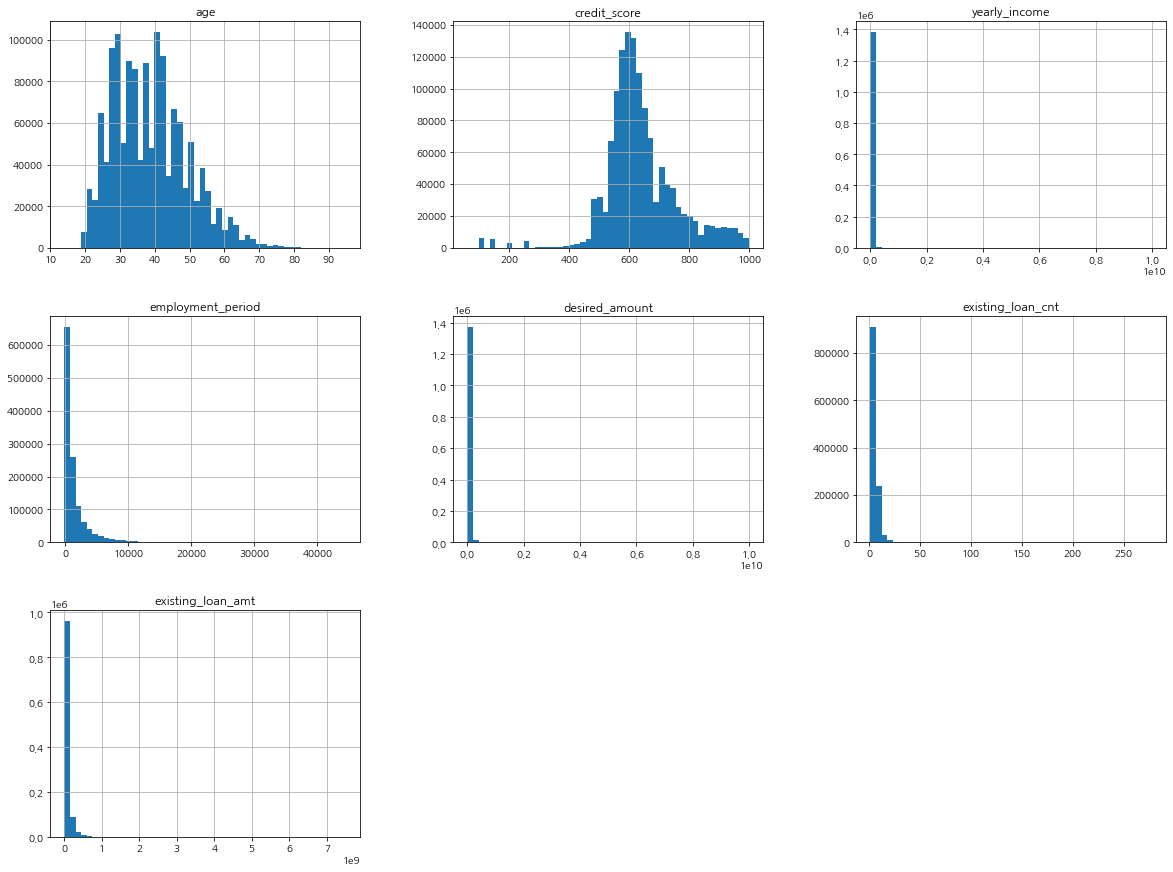

In [344]:
# 숫자형 변수에 대한 histogram
num_feature = ['age', 'credit_score', 'yearly_income', 'employment_period', 'desired_amount', 'existing_loan_cnt', 'existing_loan_amt']
user_data[num_feature].hist(bins=50, figsize = (20,15))
plt.show()

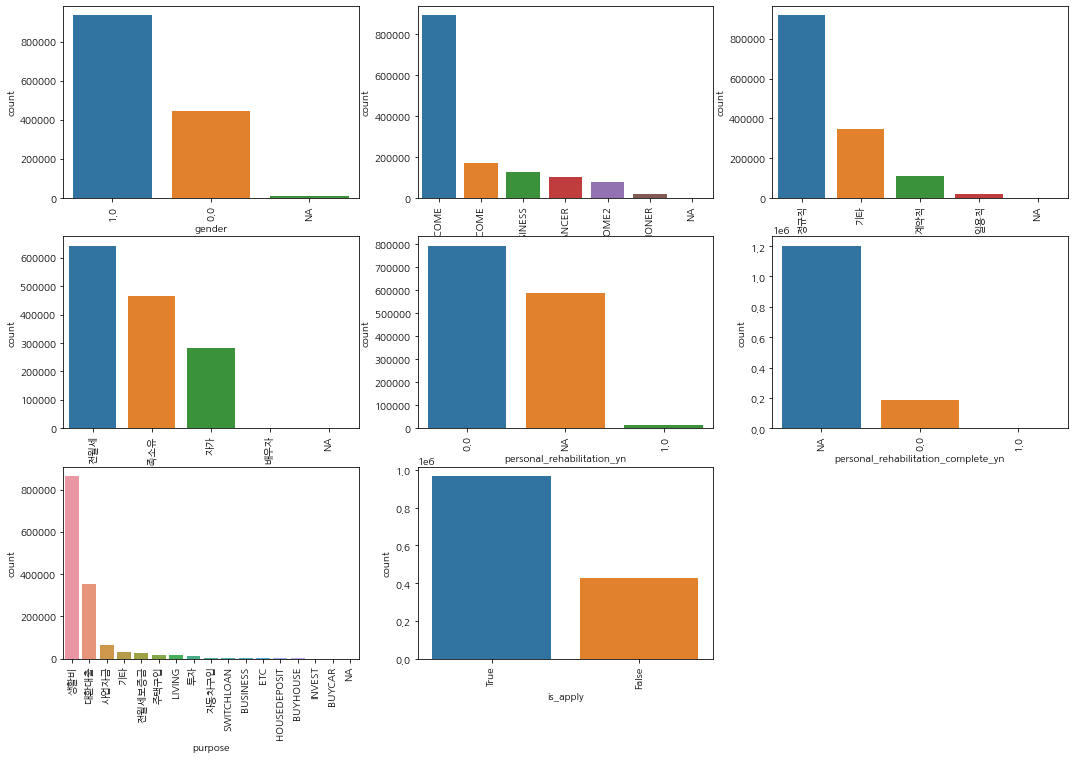

In [346]:
plt.rcParams["figure.figsize"] = (18,12)

str_feature = ['gender', 'income_type', 'employment_type', 'houseown_type','personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn','purpose','is_apply']

i = 1

for name in str_feature:
    plt.subplot(330 + i)
    plt.xticks(rotation = 90)
    tmp = user_data.copy()
    tmp.loc[tmp[name] != tmp[name],name] = 'NA'
    sns.countplot(data = tmp, x = name, order = tmp[name].value_counts().index)
    i+=1
plt.show()

In [347]:
print(user_data.insert_time.min())
print(user_data.insert_time.max())

2022-03-01 00:11:35
2022-06-30 23:58:29


In [348]:
# user_data의 train, predict set 분리
train_user = user_data[user_data.insert_time < pd.to_datetime('2022-06-01')]
predict_user = user_data[user_data.insert_time >= pd.to_datetime('2022-06-01')]
print(user_data.shape)
print(train_user.shape)
print(predict_user.shape)
print(train_user.shape[0]+predict_user.shape[0])

(1394216, 20)
(1029390, 20)
(364826, 20)
1394216


### <span style = 'background-color: #ffdce0'>**birth_year과 gender의 결측치**</span>

In [349]:
# gender와 birth_year 데이터의 결측치는 동일한 데이터에서 발생
user_data[user_data['birth_year'].isna()]['gender'].isna().sum()

12961

In [350]:
tmp = train_user.copy()
tmp['bg_na'] = train_user['birth_year'].isna() # birth_year과 gender의 NA 여부를 나타내는 변수
print(tmp.gender.isna().sum())

8603


In [351]:
print(tmp[tmp['bg_na'] == True].insert_time.min())
print(tmp[tmp['bg_na'] == True].insert_time.max())

2022-03-01 00:21:21
2022-05-31 22:50:16


gender & birthday are NA


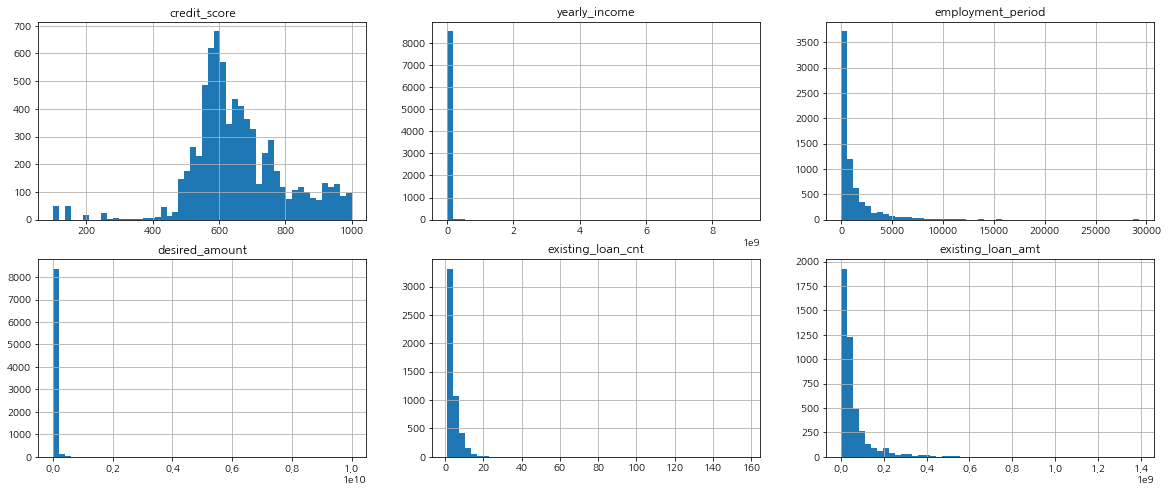

In [352]:
num_feature = ['credit_score', 'yearly_income', 'employment_period', 'desired_amount', 'existing_loan_cnt', 'existing_loan_amt']

plt.rcParams["figure.figsize"] = (20,8)
print('gender & birthday are NA')
i = 1
for name in num_feature:
    plt.subplot(230 + i)
    tmp[tmp['bg_na']][name].hist(bins=50)
    plt.title(name)
    i+=1
    
plt.show()

gender & birthday are not NA


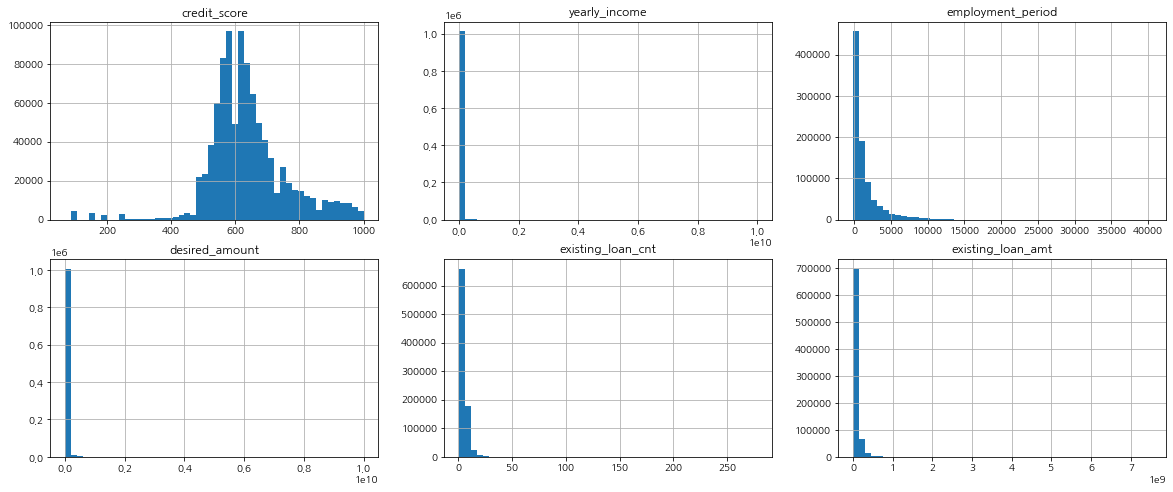

In [353]:
num_feature = ['credit_score', 'yearly_income', 'employment_period', 'desired_amount', 'existing_loan_cnt', 'existing_loan_amt']

plt.rcParams["figure.figsize"] = (20,8)
print('gender & birthday are not NA')
i = 1
for name in num_feature:
    plt.subplot(230 + i)
    tmp[~tmp['bg_na']][name].hist(bins=50)
    plt.title(name)
    i+=1
    
plt.show()

gender & birthday are NA


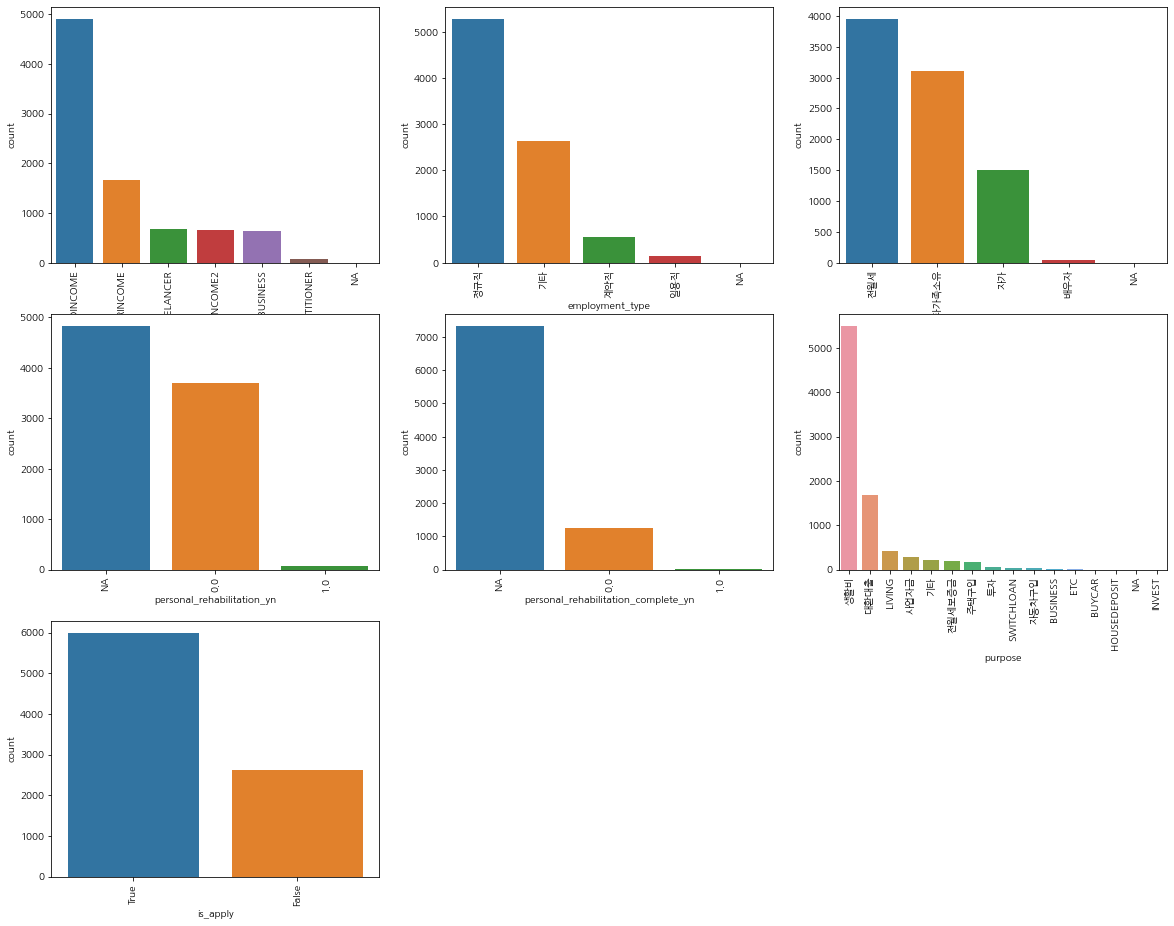

In [356]:
plt.rcParams["figure.figsize"] = (20,16)

str_feature = ['income_type', 'employment_type', 'houseown_type','personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn','purpose','is_apply']

i = 1
print('gender & birthday are NA')

for name in str_feature:
    plt.subplot(330 + i)
    plt.xticks(rotation = 90)
    tmp2 = tmp[tmp['bg_na']].copy()
    tmp2.loc[tmp2[name] != tmp2[name],name] = 'NA'
    sns.countplot(data = tmp2, x = name, order = tmp2[name].value_counts().index)
    i+=1
plt.show()

gender & birthday are not NA


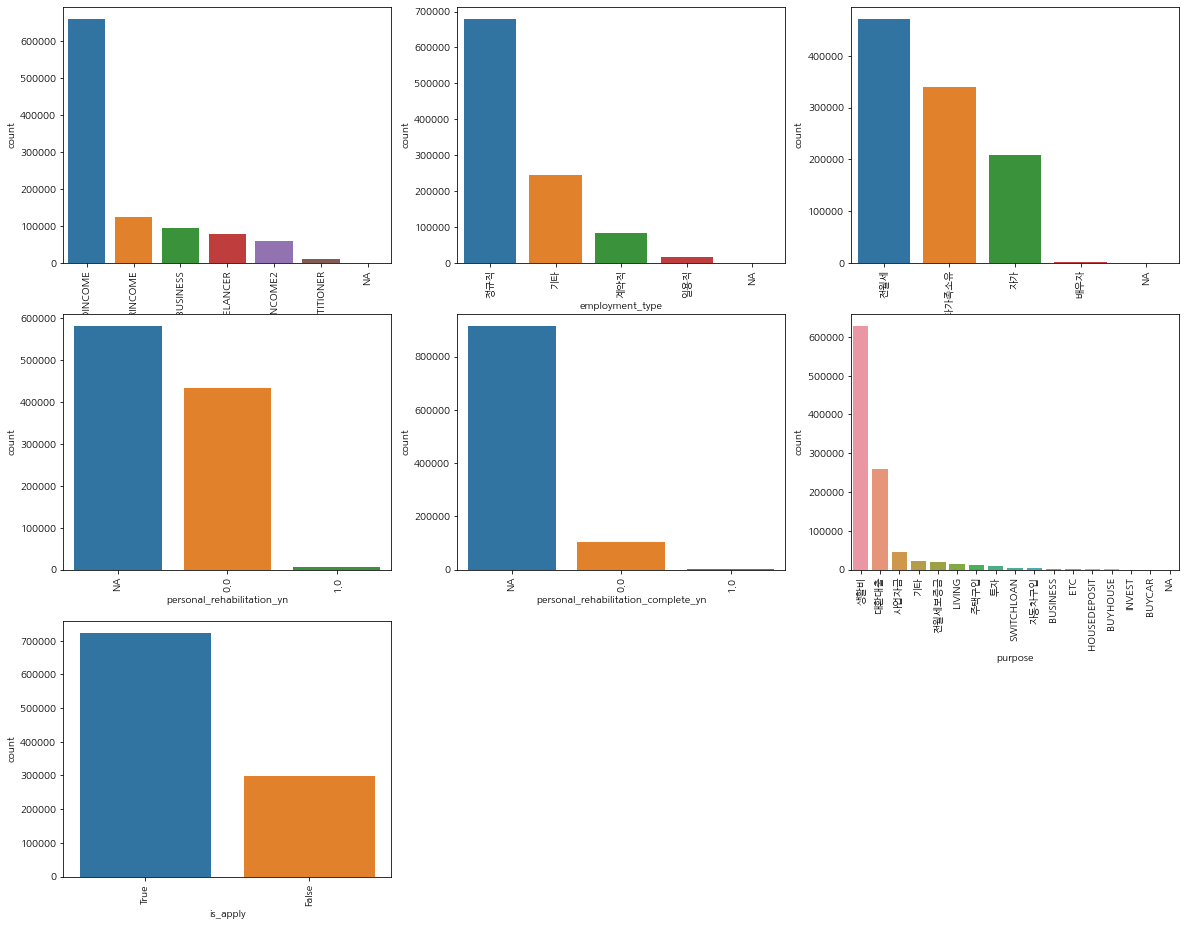

In [357]:
plt.rcParams["figure.figsize"] = (20,16)

str_feature = ['income_type', 'employment_type', 'houseown_type','personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn','purpose', 'is_apply']

i = 1
print('gender & birthday are not NA')

for name in str_feature:
    plt.subplot(330 + i)
    plt.xticks(rotation = 90)
    tmp2 = tmp[~tmp['bg_na']].copy()
    tmp2.loc[tmp2[name] != tmp2[name],name] = 'NA'
    sns.countplot(data = tmp2, x = name, order = tmp2[name].value_counts().index)
    i+=1
plt.show()

#### 남, 여 간의 분포 차이가 존재하는가?

In [358]:
tmp = train_user.copy()
print(tmp.gender.isna().sum())

8603


In [359]:
tmp[tmp.gender == 1].shape[0]

692045

num of gender1:  692045 , num of gender0:  328742


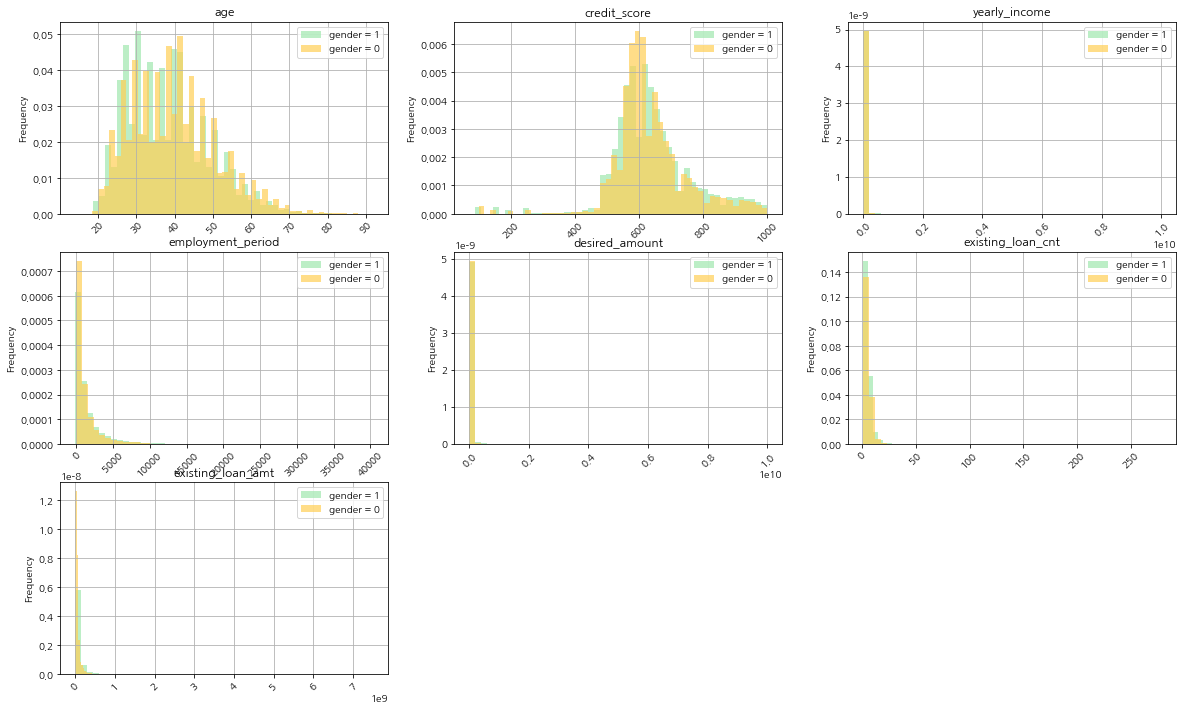

In [360]:
num_feature = ['age','credit_score', 'yearly_income', 'employment_period', 'desired_amount', 'existing_loan_cnt', 'existing_loan_amt']

plt.rcParams["figure.figsize"] = (20,12)
print('num of gender1: ', tmp[tmp.gender == 1].shape[0], ", num of gender0: ", tmp[tmp.gender == 0].shape[0])
i = 1
for name in num_feature:
    plt.subplot(330 + i)
    # density = True
    (tmp[tmp.gender == 1][name]).plot(kind = 'hist', alpha = 0.7, bins = 50, 
            rot = 45, grid=True, color = ['#A0E8AF'], label = 'gender = 1', density = True)
    (tmp[tmp.gender == 0][name]).plot(kind = 'hist', alpha = 0.7, bins = 50, 
            rot = 45, grid=True, color = ['#FFCF56'], label = 'gender = 0', density = True)
    plt.legend()
    plt.title(name)
    i+=1
    
plt.show()

num of gender1:  369396 , num of gender0:  176353


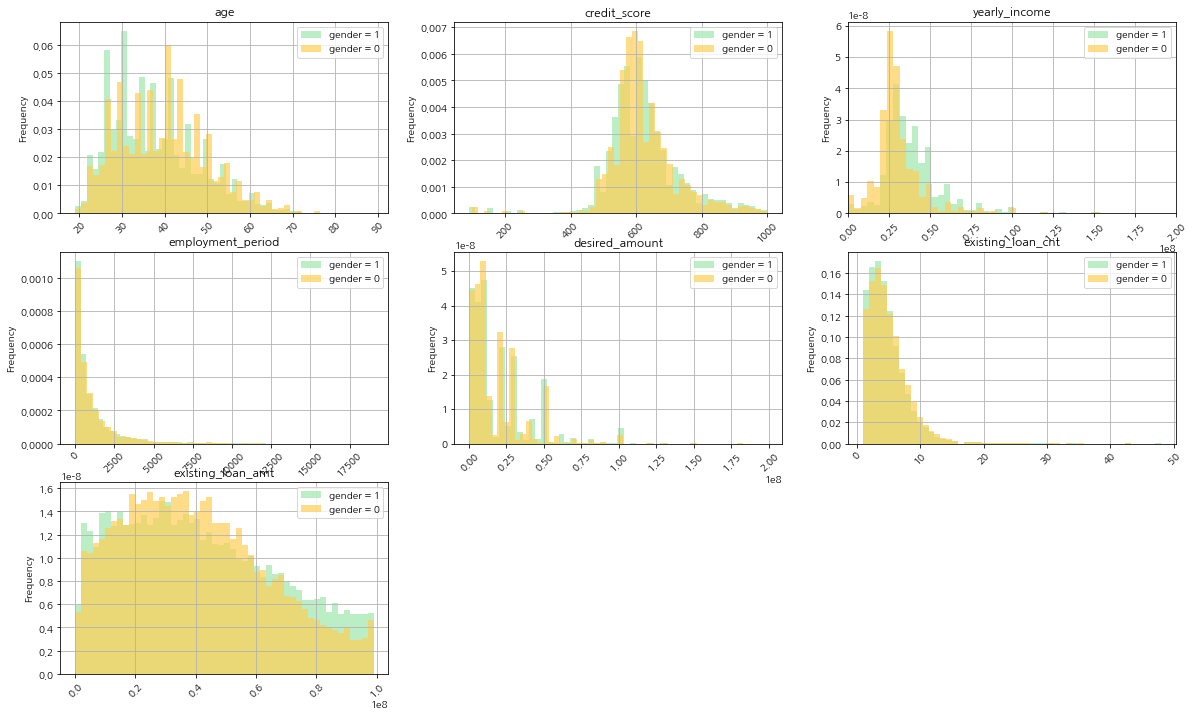

In [361]:
num_feature = ['age','credit_score', 'yearly_income', 'employment_period', 'desired_amount', 'existing_loan_cnt', 'existing_loan_amt']

plt.rcParams["figure.figsize"] = (20,12)
i = 1

# 너무 많은 값이 제거됨.
# tmp = tmp[tmp.yearly_income < np.array(tmp[['yearly_income']].describe())[6][0]] # < 75%
# tmp = tmp[tmp.desired_amount < np.array(tmp[['desired_amount']].describe())[6][0]]
# tmp = tmp[tmp.existing_loan_cnt < np.array(tmp[['existing_loan_cnt']].describe())[6][0]]
# tmp = tmp[tmp.existing_loan_amt < np.array(tmp[['existing_loan_amt']].describe())[6][0]]

# 궁금한 영역으로 확대
tmp2 = tmp[tmp.yearly_income < 0.2e+9] # < 75%
tmp2 = tmp2[tmp2.desired_amount < 0.2e+9]
tmp2 = tmp2[tmp2.employment_period < 20000]
tmp2 = tmp2[tmp2.existing_loan_cnt < 50]
tmp2 = tmp2[tmp2.existing_loan_amt < 1e+8]

print('num of gender1: ', tmp2[tmp2.gender == 1].shape[0], ", num of gender0: ", tmp2[tmp2.gender == 0].shape[0])


for name in num_feature:
    plt.subplot(330 + i)
    # density = True
    (tmp2[tmp2.gender == 1][name]).plot(kind = 'hist', alpha = 0.7, bins = 50, 
            rot = 45, grid=True, color = ['#A0E8AF'], label = 'gender = 1', density = True)
    (tmp2[tmp2.gender == 0][name]).plot(kind = 'hist', alpha = 0.7, bins = 50, 
            rot = 45, grid=True, color = ['#FFCF56'], label = 'gender = 0', density = True)
    if name == 'yearly_income': 
        
        plt.xlim(0, 0.2e+9)
    plt.legend()
    plt.title(name)
    i+=1
    
plt.show()

num of gender1:  5918 , num of gender0:  2656


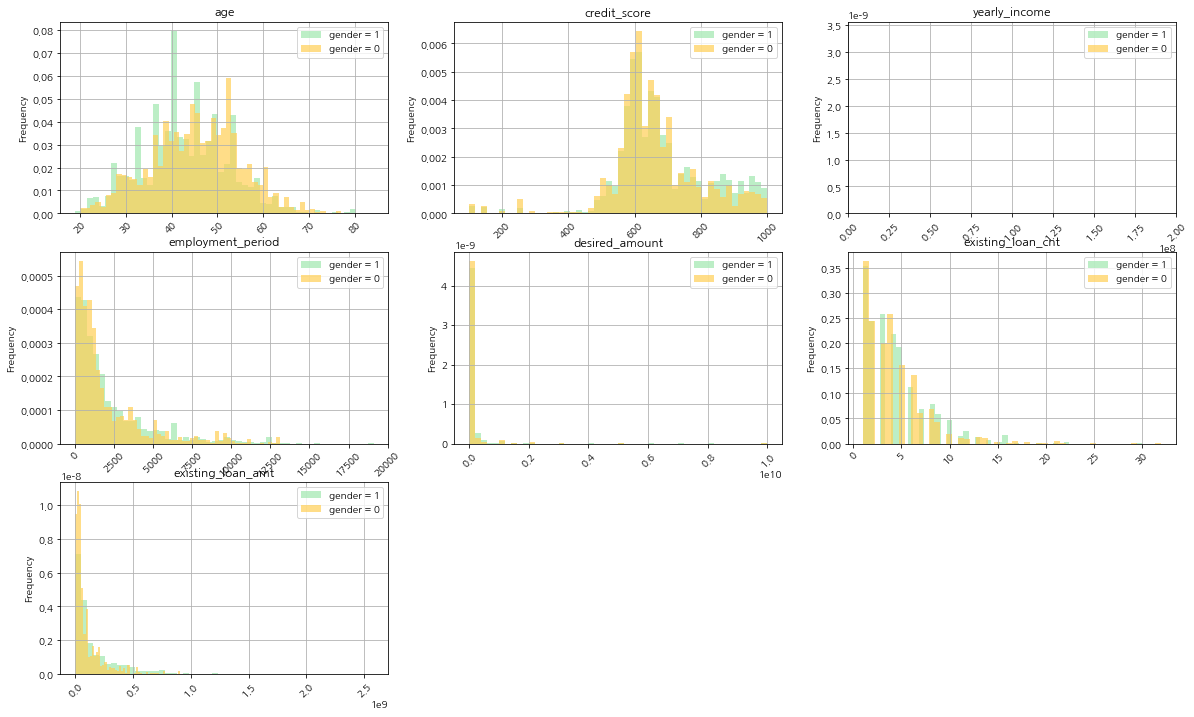

In [362]:
num_feature = ['age','credit_score', 'yearly_income', 'employment_period', 'desired_amount', 'existing_loan_cnt', 'existing_loan_amt']

plt.rcParams["figure.figsize"] = (20,12)
i = 1

# 너무 많은 값이 제거됨.
# tmp = tmp[tmp.yearly_income < np.array(tmp[['yearly_income']].describe())[6][0]] # < 75%
# tmp = tmp[tmp.desired_amount < np.array(tmp[['desired_amount']].describe())[6][0]]
# tmp = tmp[tmp.existing_loan_cnt < np.array(tmp[['existing_loan_cnt']].describe())[6][0]]
# tmp = tmp[tmp.existing_loan_amt < np.array(tmp[['existing_loan_amt']].describe())[6][0]]

# 나머지 영역은 무슨 값이 있을까
tmp3 = tmp[tmp.yearly_income >= 0.2e+9] # < 75%
# tmp3 = tmp3[tmp3.desired_amount >= 0.2e+9]
# tmp3 = tmp3[tmp3.employment_period >= 20000]
# tmp3 = tmp3[tmp3.existing_loan_cnt >= 50]
# tmp3 = tmp3[tmp3.existing_loan_amt >= 1e+8]

print('num of gender1: ', tmp3[tmp3.gender == 1].shape[0], ", num of gender0: ", tmp3[tmp3.gender == 0].shape[0])


for name in num_feature:
    plt.subplot(330 + i)
    # density = True
    (tmp3[tmp3.gender == 1][name]).plot(kind = 'hist', alpha = 0.7, bins = 50, 
            rot = 45, grid=True, color = ['#A0E8AF'], label = 'gender = 1', density = True)
    (tmp3[tmp3.gender == 0][name]).plot(kind = 'hist', alpha = 0.7, bins = 50, 
            rot = 45, grid=True, color = ['#FFCF56'], label = 'gender = 0', density = True)
    if name == 'yearly_income': 
        
        plt.xlim(0, 0.2e+9)
    plt.legend()
    plt.title(name)
    i+=1
    
plt.show()

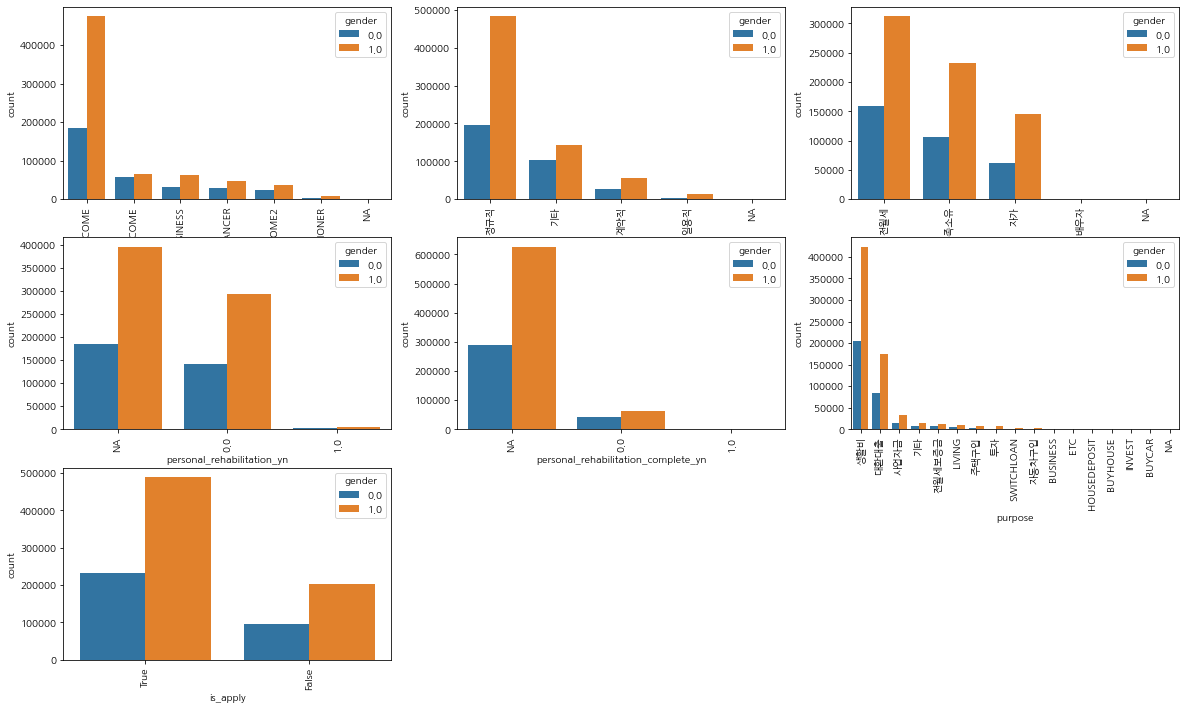

In [363]:
plt.rcParams["figure.figsize"] = (20,12)

str_feature = ['income_type', 'employment_type', 'houseown_type','personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn','purpose', 'is_apply']

class_name = 'gender'

i = 1

for name in str_feature:
    plt.subplot(330 + i)
    plt.xticks(rotation = 90)
    tmp2 = tmp.copy()
    tmp2.loc[tmp2[name] != tmp2[name],name] = 'NA'
#     (tmp2.groupby(class_name)[name]
#         .value_counts(normalize=True)
#         .mul(100)
#         .rename('percent')
#         .reset_index()
#         .pipe((sns.catplot, 'data'), x = class_name, y = 'percent', hue = name, kind='bar'))
    sns.countplot(data = tmp2, x = name, order = tmp2[name].value_counts().index, hue = 'gender')
    i+=1
plt.show()

In [364]:
# 결측인 데이터
# 대출을 신청한 사람과 신청하지 않은 사람 두 그룹에게 차이가 있을까??
print('총 인원: ', train_user[train_user.birth_year.isna()].shape[0])
print('대출 신청 인원: ', len(set(train_user[train_user.birth_year.isna()].application_id.unique()).intersection(total_list)))
train_user[train_user.birth_year.isna()].head()

총 인원:  8603
대출 신청 인원:  5991


,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,employment_period,age,is_apply
253,132643,49072,NaN,NaN,2022-04-20 19:47:49,560.0,32000000.0,OTHERINCOME,NaT,기타,기타가족소유,10000000.0,대환대출,NaN,NaN,5.0,45000000.0,NaN,NaN,True
507,1093354,77317,NaN,NaN,2022-03-29 14:06:02,540.0,6000000.0,EARNEDINCOME2,2021-07-01,계약직,기타가족소유,5000000.0,생활비,NaN,NaN,NaN,NaN,271.0,NaN,True
891,954344,364670,NaN,NaN,2022-03-19 21:05:28,950.0,10000000.0,PRIVATEBUSINESS,2020-05-01,정규직,기타가족소유,20000000.0,사업자금,NaN,NaN,NaN,NaN,687.0,NaN,True
979,1082273,587345,NaN,NaN,2022-05-31 09:58:59,NaN,15000000.0,EARNEDINCOME,2021-03-01,정규직,전월세,20000000.0,생활비,0.0,0.0,NaN,NaN,456.0,NaN,False
1038,2100576,744785,NaN,NaN,2022-03-29 16:44:04,740.0,34000000.0,EARNEDINCOME,2021-09-01,정규직,기타가족소유,40000000.0,기타,NaN,NaN,NaN,NaN,209.0,NaN,True


In [ ]:
# 모델은 이 결측치를 어떻게 추청할까
# 모델 추정 -> 남 녀 별 분포 그려보기 -> 만약 모델이 적절하다면 결측이 아닌 데이터와 비슷한 맥락으로 나와야 하지 않을까?
# 대출 신청 여부를 변수로 넣어서? (o)


<span style = 'background-color: #ffdce0'>**credit_score의 결측치**</span>

In [273]:
tmp = user_data.copy()
tmp['cs_na'] = user_data['credit_score'].isna() # birth_year과 gender의 NA 여부를 나타내는 변수

In [274]:
print(tmp[tmp['cs_na'] == True].insert_time.min())
print(tmp[tmp['cs_na'] == True].insert_time.max())

2022-03-01 00:13:02
2022-06-30 23:54:16


credit_score are NA


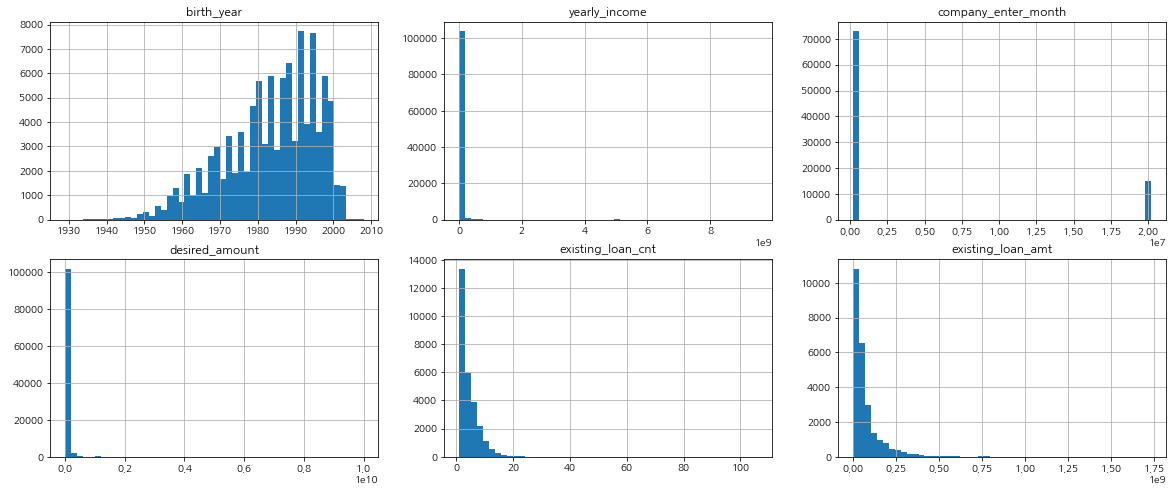

In [275]:
num_feature = ['birth_year', 'yearly_income', 'employment_period', 'desired_amount', 'existing_loan_cnt', 'existing_loan_amt']

plt.rcParams["figure.figsize"] = (20,8)
print('credit_score are NA')

i = 1
for name in num_feature:
    plt.subplot(230 + i)
    tmp[tmp['cs_na']][name].hist(bins=50)
    plt.title(name)
    i+=1
    
plt.show()

credit_score are not NA


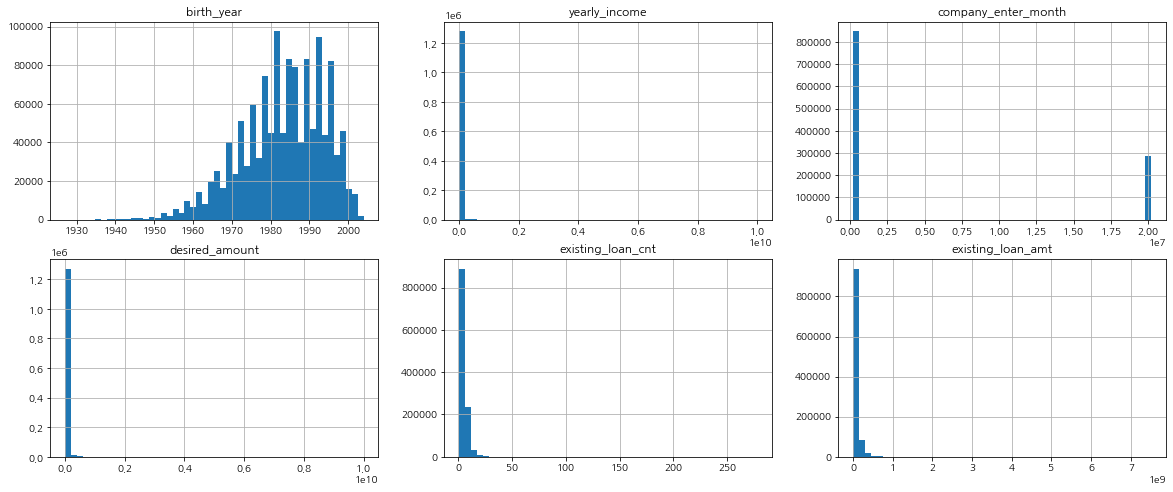

In [276]:
num_feature = ['birth_year', 'yearly_income', 'employment_period', 'desired_amount', 'existing_loan_cnt', 'existing_loan_amt']

plt.rcParams["figure.figsize"] = (20,8)
print('credit_score are not NA')

i = 1
for name in num_feature:
    plt.subplot(230 + i)
    tmp[~tmp['cs_na']][name].hist(bins=50)
    plt.title(name)
    i+=1
    
plt.show()

credit_score are NA


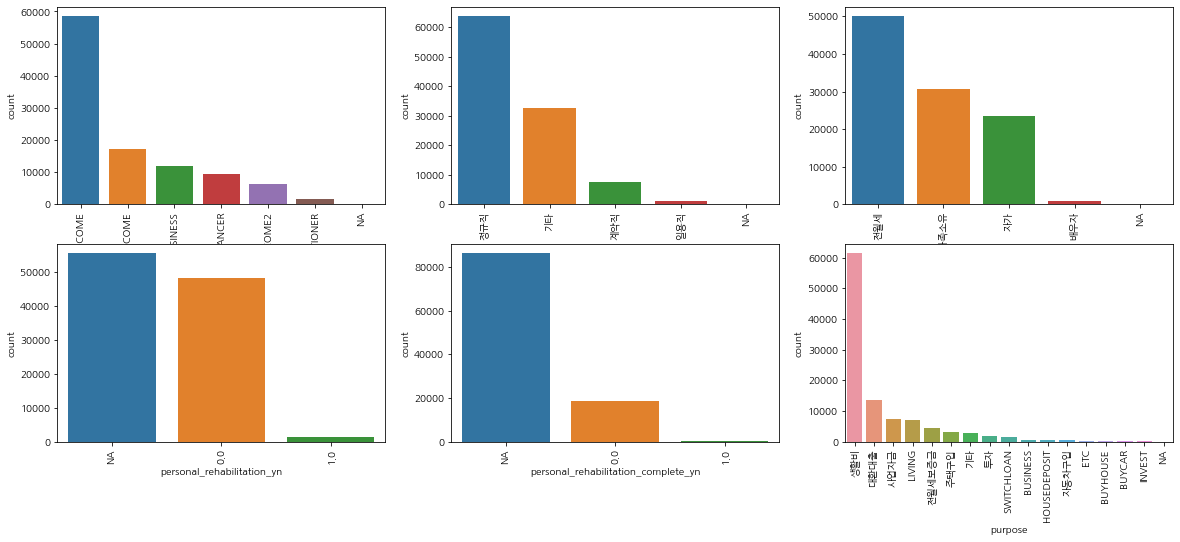

In [218]:
plt.rcParams["figure.figsize"] = (20,8)

str_feature = ['income_type', 'employment_type', 'houseown_type','personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn','purpose']

i = 1
print('credit_score are NA')

for name in str_feature:
    plt.subplot(230 + i)
    plt.xticks(rotation = 90)
    tmp2 = tmp[tmp['cs_na']].copy()
    tmp2.loc[tmp2[name] != tmp2[name],name] = 'NA'
    sns.countplot(data = tmp2, x = name, order = tmp2[name].value_counts().index)
    i+=1
plt.show()

credit_score are not NA


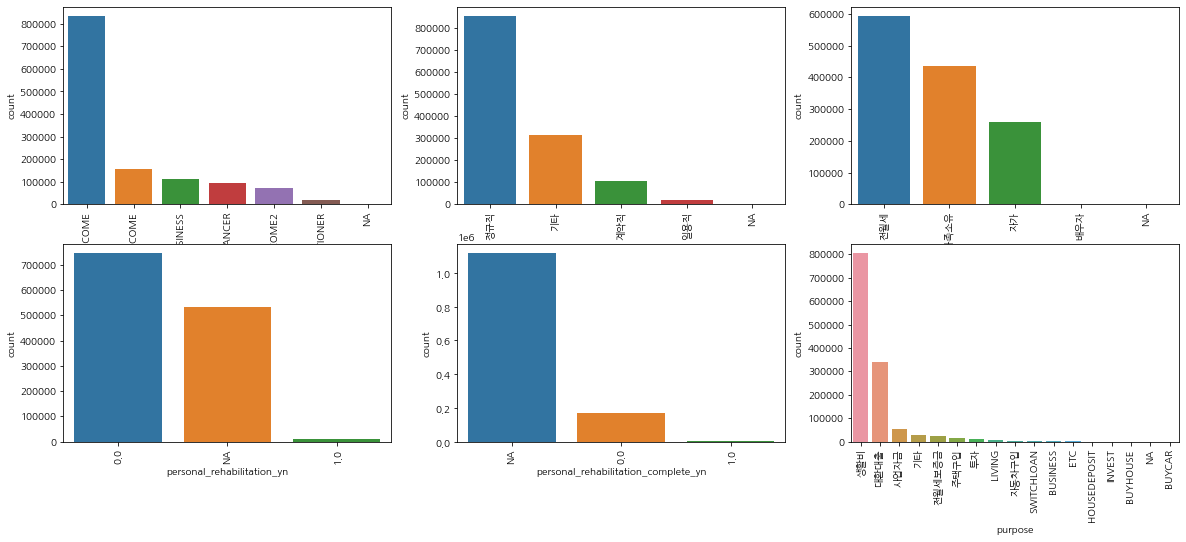

In [220]:
plt.rcParams["figure.figsize"] = (20,8)

str_feature = ['income_type', 'employment_type', 'houseown_type','personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn','purpose']

i = 1
print('credit_score are not NA')

for name in str_feature:
    plt.subplot(230 + i)
    plt.xticks(rotation = 90)
    tmp2 = tmp[~tmp['cs_na']].copy()
    tmp2.loc[tmp2[name] != tmp2[name],name] = 'NA'
    sns.countplot(data = tmp2, x = name, order = tmp2[name].value_counts().index)
    i+=1
plt.show()

<span style = 'background-color: #ffdce0'>**income_type, employment_type, houseown_type, desired_amount, purpose의 결측치**</span>

In [223]:
user_data[user_data['income_type'].isna()].isna().sum()

application_id                          0
user_id                                 0
birth_year                              2
gender                                  2
insert_time                             0
credit_score                            3
yearly_income                          85
income_type                            85
company_enter_month                    85
employment_type                        85
houseown_type                          85
desired_amount                         85
purpose                                85
personal_rehabilitation_yn             85
personal_rehabilitation_complete_yn    85
existing_loan_cnt                      16
existing_loan_amt                      22
dtype: int64

In [230]:
user_data[user_data['income_type'].isna()].application_id.unique()

array([ 129515, 1468193, 1234909, 1068316, 2082836, 1923997, 1979233,
       1100062,    2726, 1191110, 1862054, 1464532, 1692846,  872487,
         54838, 1127034, 2120132,  307312, 2135078, 1445393,  364352,
       2018299, 1593966, 1112045,  719498, 1100804,  202549,  175411,
        119198, 1542565,  355216,  538698, 2044362,   18754,  680297,
       1160779,   50913, 1425120, 1405586, 1480233, 1646720, 1049824,
        712231,  541898,  822575, 1593260, 1843150, 1983683,   47667,
         52994,  717987,  449033,  875268,  960482, 1290239, 2071499,
         14853,  917149,  703310,  131509, 1870377, 2147810, 1830253,
       1993693,  741561, 1609422,   98442, 1284387, 1944878,  108081,
       1860326,  951828,  873720,  891191, 1334173,  496625, 1991124,
       1782222, 1731663, 1203905,  450732,  657920,  596953,  999720,
       1223986], dtype=int64)

In [250]:
na_id = user_data[user_data['income_type'].isna()].application_id.unique()
na_id = list(na_id)
total_list = list(loan_table.application_id.unique())

In [253]:
yn = []
for idid in na_id:
    yn.append(idid in total_list)

In [255]:
np.array(yn)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [ ]:
# 85개 데이터 삭제
# 코드 삽입

<span style = 'background-color: #ffdce0'>**employment_period의 결측치**</span>

In [278]:
tmp = user_data.copy()
tmp['cem_na'] = user_data['employment_period'].isna()

In [279]:
tmp[tmp['cem_na']].isna().sum()

application_id                              0
user_id                                     0
birth_year                               2954
gender                                   2954
insert_time                                 0
credit_score                            17211
yearly_income                              89
income_type                                85
company_enter_month                    171760
employment_type                            85
houseown_type                              85
desired_amount                             85
purpose                                    85
personal_rehabilitation_yn              68671
personal_rehabilitation_complete_yn    148204
existing_loan_cnt                       30229
existing_loan_amt                       47738
cem_na                                      0
dtype: int64

In [280]:
print(tmp[tmp['cem_na'] == True].insert_time.min())
print(tmp[tmp['cem_na'] == True].insert_time.max())

2022-03-01 00:11:35
2022-06-30 23:55:58


company_enter_month are NA


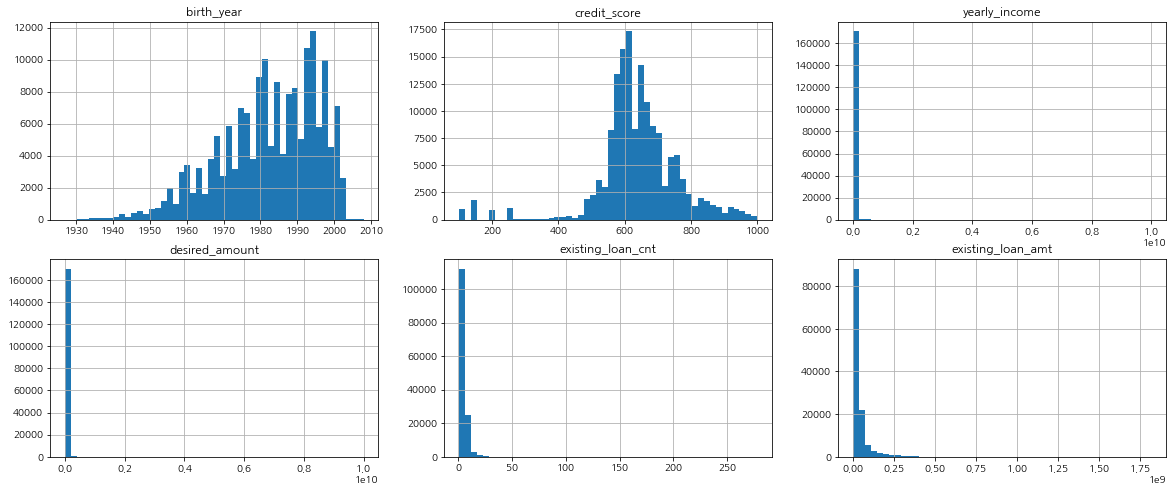

In [281]:
num_feature = ['birth_year','credit_score', 'yearly_income', 'desired_amount', 'existing_loan_cnt', 'existing_loan_amt']

plt.rcParams["figure.figsize"] = (20,8)
print('company_enter_month are NA')
i = 1
for name in num_feature:
    plt.subplot(230 + i)
    tmp[tmp['cem_na']][name].hist(bins=50)
    plt.title(name)
    i+=1
    
plt.show()

company_enter_month are not NA


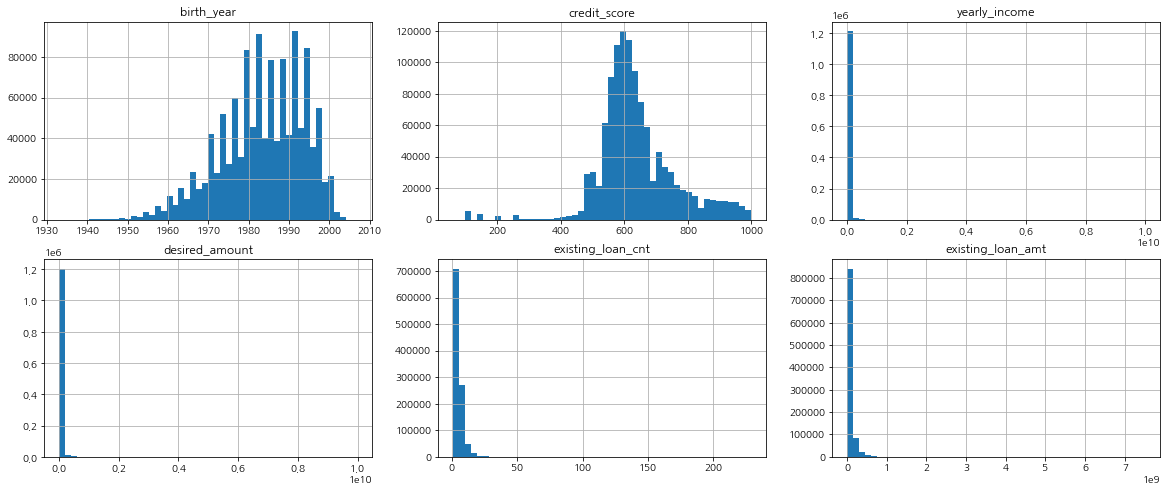

In [282]:
num_feature = ['birth_year','credit_score', 'yearly_income', 'desired_amount', 'existing_loan_cnt', 'existing_loan_amt']

plt.rcParams["figure.figsize"] = (20,8)
print('company_enter_month are not NA')
i = 1
for name in num_feature:
    plt.subplot(230 + i)
    tmp[~tmp['cem_na']][name].hist(bins=50)
    plt.title(name)
    i+=1
    
plt.show()

In [286]:
user_data.income_type.unique()

array(['PRIVATEBUSINESS', 'FREELANCER', 'EARNEDINCOME', 'OTHERINCOME',
       'EARNEDINCOME2', 'PRACTITIONER', nan], dtype=object)

company_enter_month are NA


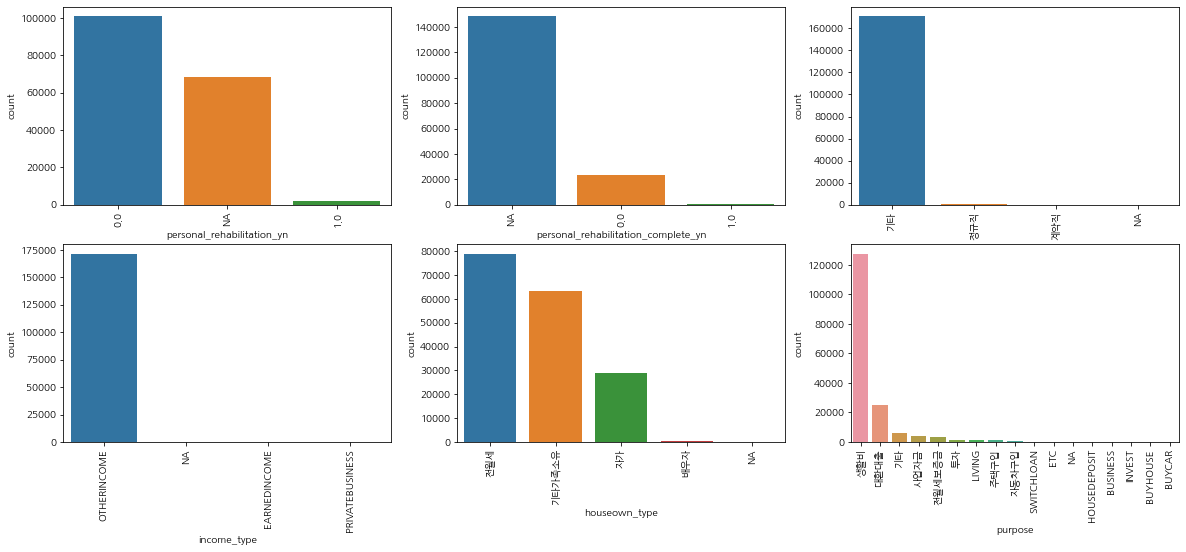

In [302]:
plt.rcParams["figure.figsize"] = (20,8)

str_feature = ['personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn', 'employment_type','income_type', 'houseown_type','purpose']

i = 1
print('company_enter_month are NA')

for name in str_feature:
    plt.subplot(230 + i)
    if name == 'income_type': plt.xticks(rotation = 90)
    else: plt.xticks(rotation = 90)
    tmp2 = tmp[tmp['cem_na']].copy()
    tmp2.loc[tmp2[name] != tmp2[name],name] = 'NA'
    sns.countplot(data = tmp2, x = name, order = tmp2[name].value_counts().index)
    i+=1
plt.show()

company_enter_month are not NA


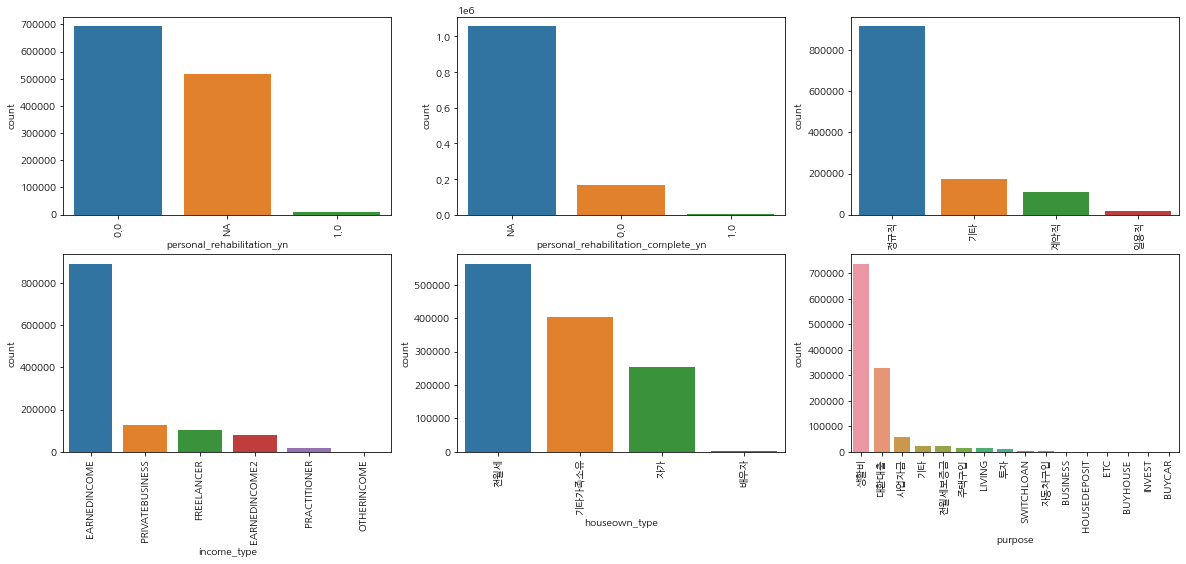

In [305]:
plt.rcParams["figure.figsize"] = (20,8)

str_feature = ['personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn', 'employment_type','income_type', 'houseown_type','purpose']

i = 1
print('company_enter_month are not NA')

for name in str_feature:
    plt.subplot(230 + i)
    if name == 'income_type': plt.xticks(rotation = 90)
    else: plt.xticks(rotation = 90)
    tmp2 = tmp[~tmp['cem_na']].copy()
    tmp2.loc[tmp2[name] != tmp2[name],name] = 'NA'
    sns.countplot(data = tmp2, x = name, order = tmp2[name].value_counts().index)
    i+=1
plt.show()

<span style = 'background-color: #ffdce0'>**existing_loan_cnt의 결측치**</span>

In [307]:
tmp = user_data.copy()
tmp['elc_na'] = user_data['existing_loan_cnt'].isna()

In [308]:
tmp[tmp['elc_na']].isna().sum()

application_id                              0
user_id                                     0
birth_year                               5245
gender                                   5245
insert_time                                 0
credit_score                            77310
yearly_income                              17
income_type                                16
company_enter_month                     30229
employment_type                            16
houseown_type                              16
desired_amount                             16
purpose                                    16
personal_rehabilitation_yn             106402
personal_rehabilitation_complete_yn    161156
existing_loan_cnt                      198556
existing_loan_amt                      198556
elc_na                                      0
dtype: int64

In [309]:
print(tmp[tmp['elc_na'] == True].insert_time.min())
print(tmp[tmp['elc_na'] == True].insert_time.max())

2022-03-01 00:13:13
2022-06-30 23:55:58


existing loan cnt are NA


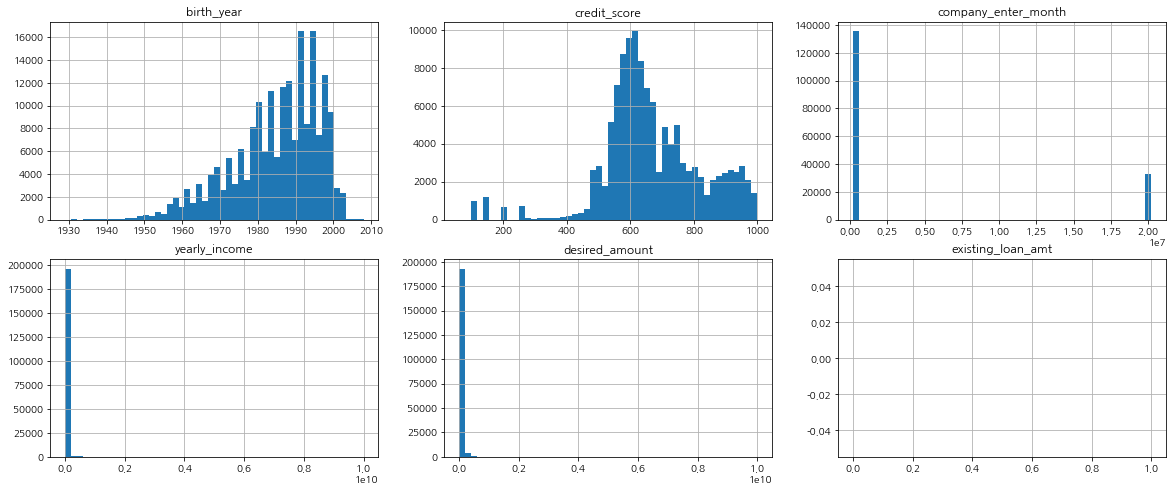

In [310]:
num_feature = ['birth_year','credit_score','employment_period', 'yearly_income', 'desired_amount', 'existing_loan_amt']

plt.rcParams["figure.figsize"] = (20,8)
print('existing loan cnt are NA')
i = 1
for name in num_feature:
    plt.subplot(230 + i)
    tmp[tmp['elc_na']][name].hist(bins=50)
    plt.title(name)
    i+=1
    
plt.show()

existing loan cnt are not NA


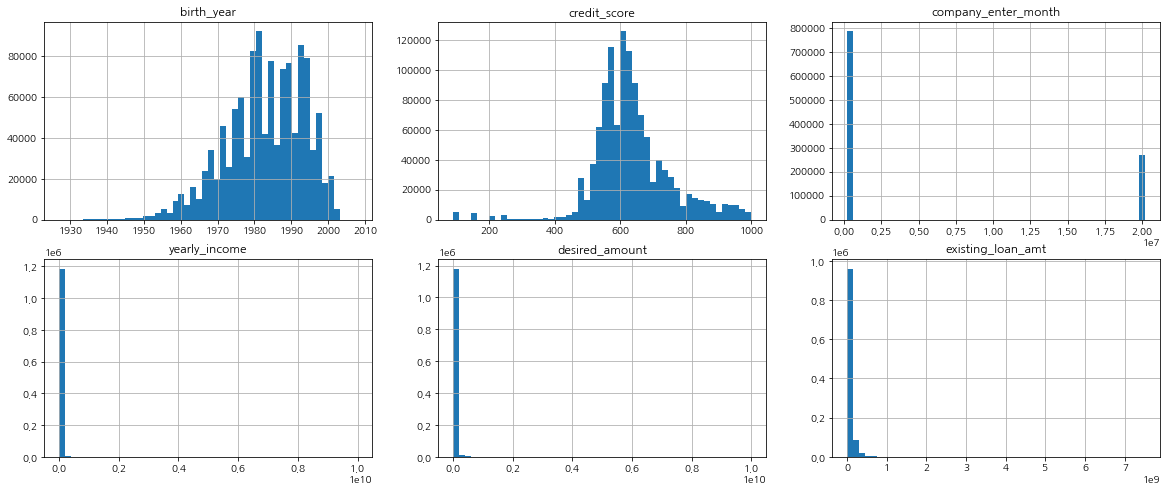

In [311]:
num_feature = ['birth_year','credit_score','employment_period', 'yearly_income', 'desired_amount', 'existing_loan_amt']

plt.rcParams["figure.figsize"] = (20,8)
print('existing loan cnt are not NA')
i = 1
for name in num_feature:
    plt.subplot(230 + i)
    tmp[~tmp['elc_na']][name].hist(bins=50)
    plt.title(name)
    i+=1
    
plt.show()

existing_loan_cnt are NA


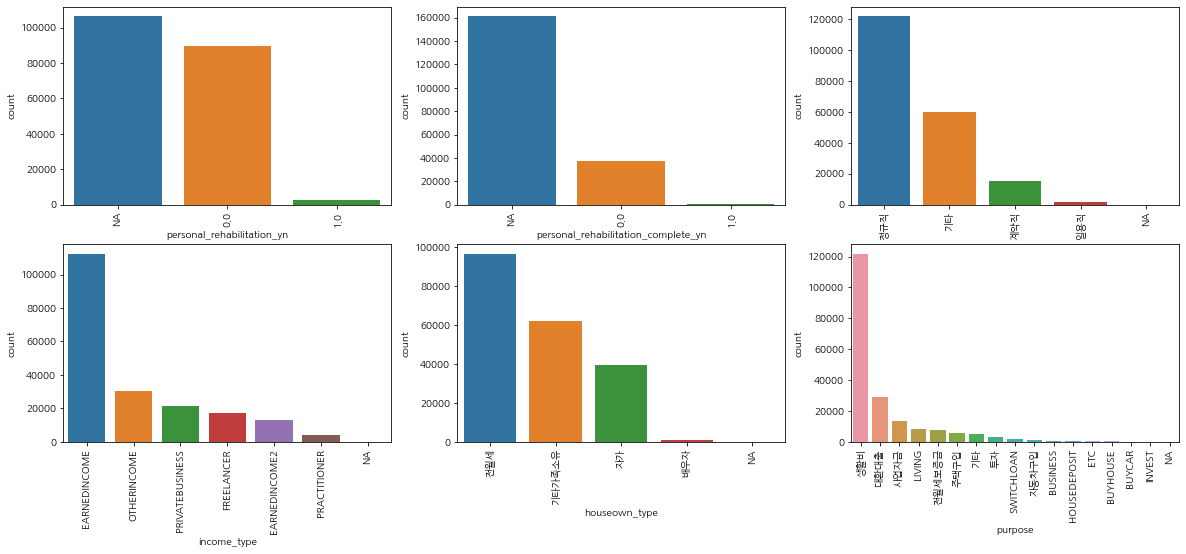

In [313]:
plt.rcParams["figure.figsize"] = (20,8)

str_feature = ['personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn', 'employment_type','income_type', 'houseown_type','purpose']

i = 1
print('existing_loan_cnt are NA')

for name in str_feature:
    plt.subplot(230 + i)
    if name == 'income_type': plt.xticks(rotation = 90)
    else: plt.xticks(rotation = 90)
    tmp2 = tmp[tmp['elc_na']].copy()
    tmp2.loc[tmp2[name] != tmp2[name],name] = 'NA'
    sns.countplot(data = tmp2, x = name, order = tmp2[name].value_counts().index)
    i+=1
plt.show()

existing_loan_cnt are not NA


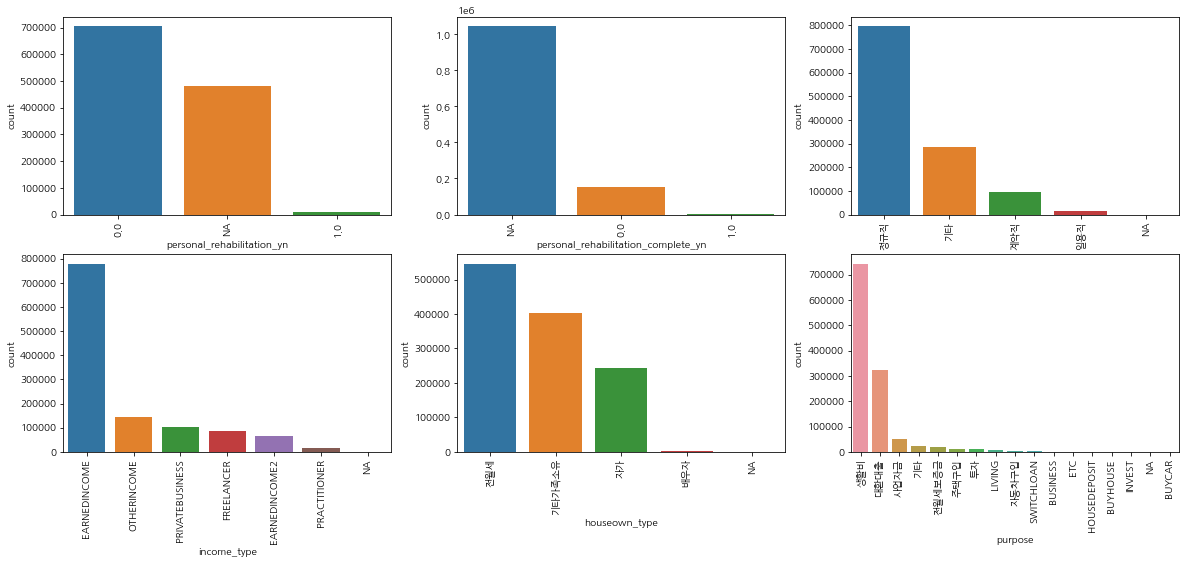

In [312]:
plt.rcParams["figure.figsize"] = (20,8)

str_feature = ['personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn', 'employment_type','income_type', 'houseown_type','purpose']

i = 1
print('existing_loan_cnt are not NA')

for name in str_feature:
    plt.subplot(230 + i)
    if name == 'income_type': plt.xticks(rotation = 90)
    else: plt.xticks(rotation = 90)
    tmp2 = tmp[~tmp['elc_na']].copy()
    tmp2.loc[tmp2[name] != tmp2[name],name] = 'NA'
    sns.countplot(data = tmp2, x = name, order = tmp2[name].value_counts().index)
    i+=1
plt.show()

<span style = 'background-color: #ffdce0'>**existing_loan_amt의 결측치**</span>

In [314]:
tmp = user_data.copy()
tmp['ela_na'] = user_data['existing_loan_amt'].isna()

In [315]:
tmp[tmp['ela_na']].isna().sum()

application_id                              0
user_id                                     0
birth_year                               6137
gender                                   6137
insert_time                                 0
credit_score                            79704
yearly_income                              23
income_type                                22
company_enter_month                     47738
employment_type                            22
houseown_type                              22
desired_amount                             22
purpose                                    22
personal_rehabilitation_yn             150464
personal_rehabilitation_complete_yn    261451
existing_loan_cnt                      198556
existing_loan_amt                      313774
ela_na                                      0
dtype: int64

In [316]:
print(tmp[tmp['ela_na'] == True].insert_time.min())
print(tmp[tmp['ela_na'] == True].insert_time.max())

2022-03-01 00:13:01
2022-06-30 23:55:58


existing loan amt are NA


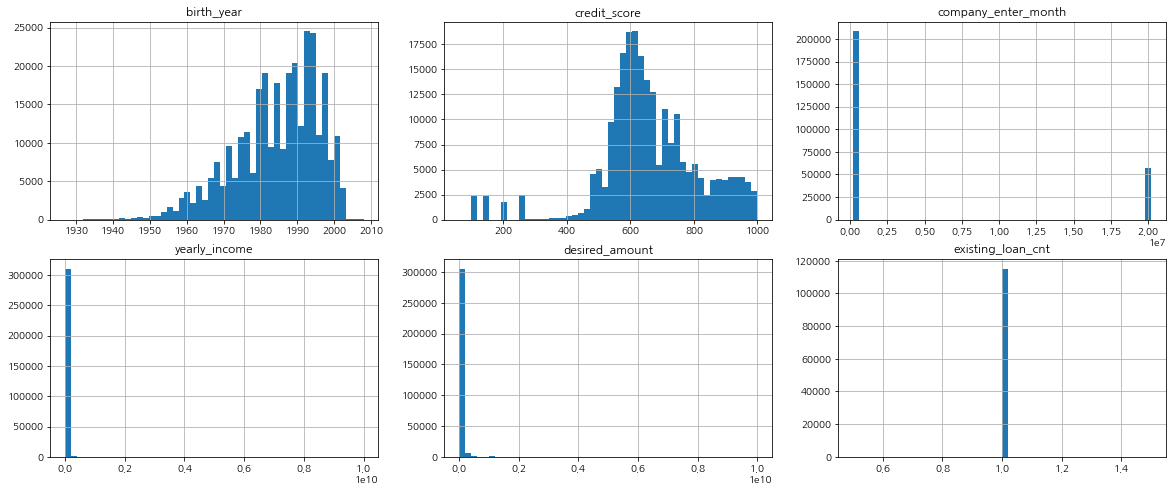

In [317]:
num_feature = ['birth_year','credit_score','employment_period', 'yearly_income', 'desired_amount', 'existing_loan_cnt']

plt.rcParams["figure.figsize"] = (20,8)
print('existing loan amt are NA')
i = 1
for name in num_feature:
    plt.subplot(230 + i)
    tmp[tmp['ela_na']][name].hist(bins=50)
    plt.title(name)
    i+=1
    
plt.show()

existing loan amt are NA


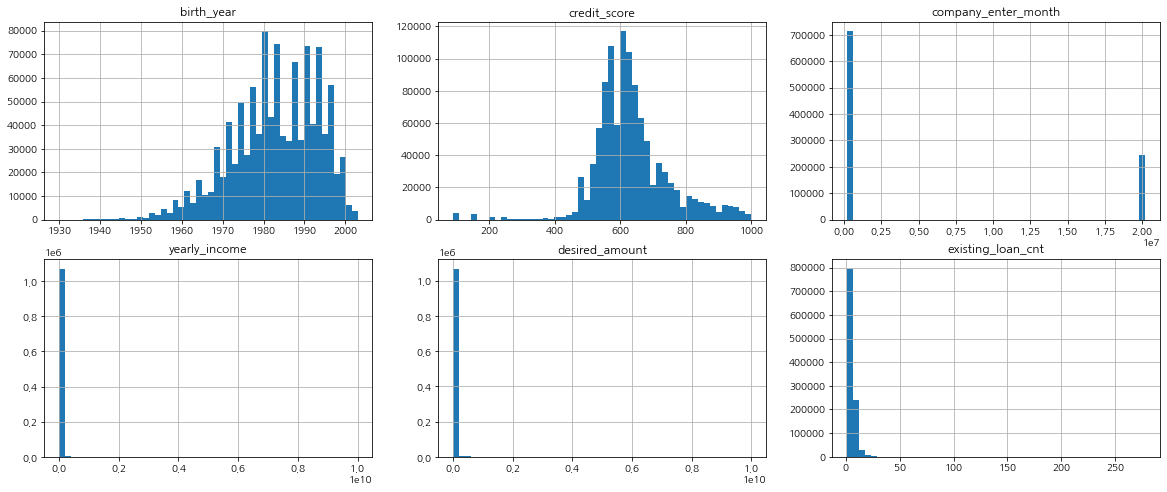

In [318]:
num_feature = ['birth_year','credit_score','employment_period', 'yearly_income', 'desired_amount', 'existing_loan_cnt']

plt.rcParams["figure.figsize"] = (20,8)
print('existing loan amt are NA')
i = 1
for name in num_feature:
    plt.subplot(230 + i)
    tmp[~tmp['ela_na']][name].hist(bins=50)
    plt.title(name)
    i+=1
    
plt.show()

existing_loan_amt are NA


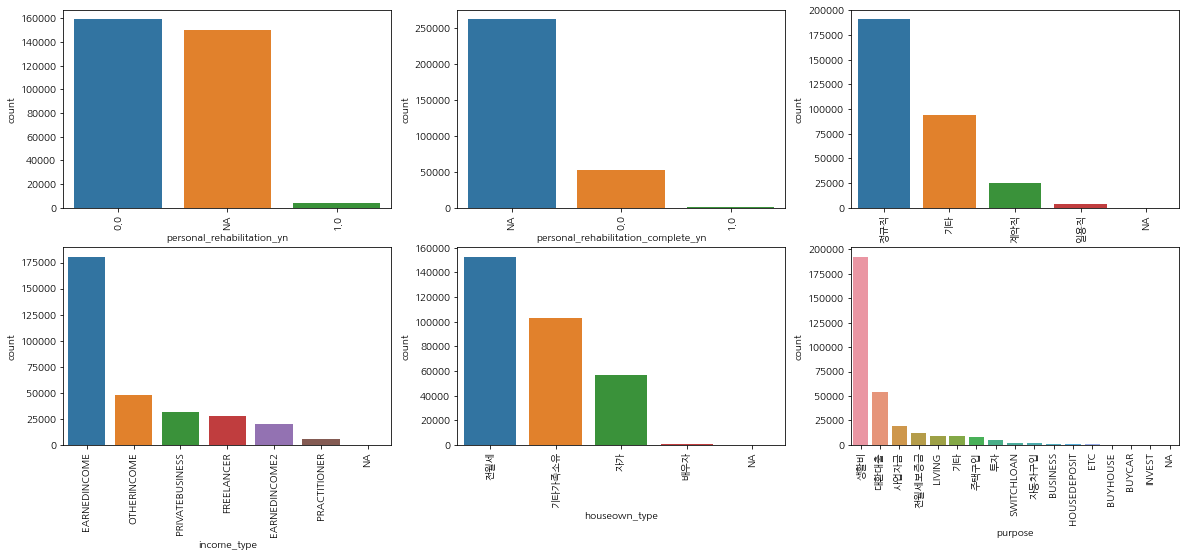

In [319]:
plt.rcParams["figure.figsize"] = (20,8)

str_feature = ['personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn', 'employment_type','income_type', 'houseown_type','purpose']

i = 1
print('existing_loan_amt are NA')

for name in str_feature:
    plt.subplot(230 + i)
    if name == 'income_type': plt.xticks(rotation = 90)
    else: plt.xticks(rotation = 90)
    tmp2 = tmp[tmp['ela_na']].copy()
    tmp2.loc[tmp2[name] != tmp2[name],name] = 'NA'
    sns.countplot(data = tmp2, x = name, order = tmp2[name].value_counts().index)
    i+=1
plt.show()

existing_loan_amt are not NA


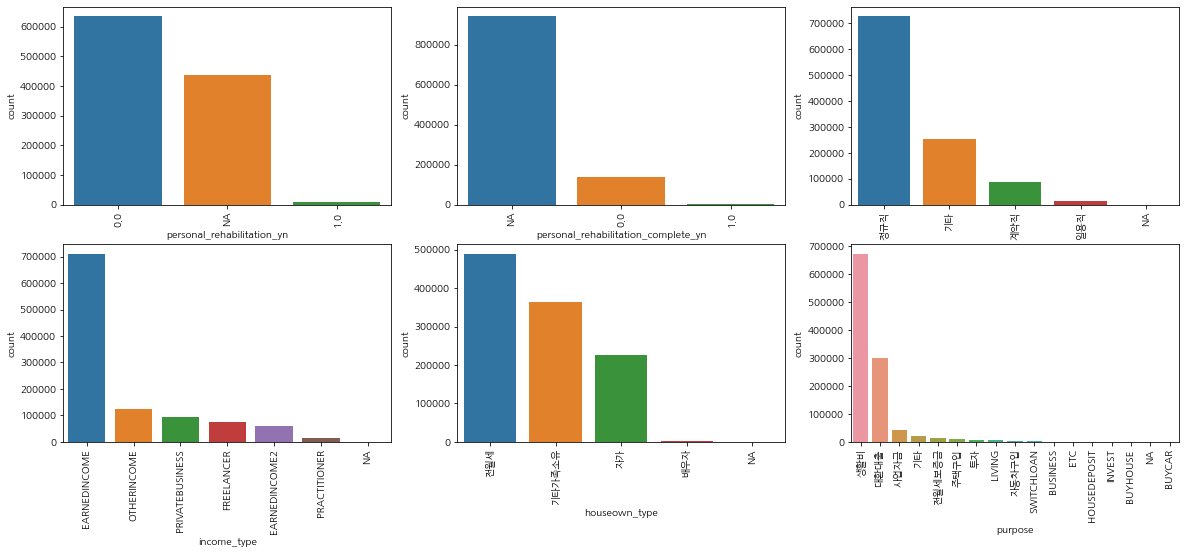

In [322]:
plt.rcParams["figure.figsize"] = (20,8)

str_feature = ['personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn', 'employment_type','income_type', 'houseown_type','purpose']

i = 1
print('existing_loan_amt are not NA')

for name in str_feature:
    plt.subplot(230 + i)
    if name == 'income_type': plt.xticks(rotation = 90)
    else: plt.xticks(rotation = 90)
    tmp2 = tmp[~tmp['ela_na']].copy()
    tmp2.loc[tmp2[name] != tmp2[name],name] = 'NA'
    sns.countplot(data = tmp2, x = name, order = tmp2[name].value_counts().index)
    i+=1
plt.show()

## loan_result

#### 대출상품결과테이블(loan_result)
- appliation_id : 신청서 번호
- loanapply_insert_time : 한도조회 일시
- bank_id : 금융사 번호
- product_id : 상품 번호
- loan_limit : 승인한도 (십만단위 반올림)
- loan_rate : 승인금리 (둘째자리 반올림)
- is_applied : 신청여부(target variable)

In [11]:
print(loan_table.info())
loan_table.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527363 entries, 0 to 13527362
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  object 
 2   bank_id                int64  
 3   product_id             int64  
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
dtypes: float64(3), int64(3), object(1)
memory usage: 722.4+ MB
None


,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN


In [14]:
print(loan_table.loanapply_insert_time.min())
print(loan_table.loanapply_insert_time.max())

2022-03-01 00:11:36
2022-06-30 23:55:00


In [19]:
predict_loan = loan_table[loan_table.is_applied.isna()]
train_loan = loan_table[~loan_table.is_applied.isna()]

In [20]:
print(predict_loan.loanapply_insert_time.min())
print(predict_loan.loanapply_insert_time.max())
print(train_loan.loanapply_insert_time.min())
print(train_loan.loanapply_insert_time.max())

2022-06-01 00:12:24
2022-06-30 23:55:00
2022-03-01 00:11:36
2022-05-31 23:54:38


In [21]:
predict_loan.isna().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                  1757
loan_rate                   1757
is_applied               3257239
dtype: int64

In [22]:
train_loan.isna().sum()

application_id              0
loanapply_insert_time       0
bank_id                     0
product_id                  0
loan_limit               5738
loan_rate                5738
is_applied                  0
dtype: int64

In [25]:
predict_loan[predict_loan.loan_limit.isna()]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
461,1029177,2022-06-07 15:29:06,51,21,NaN,NaN,NaN
4318,1086409,2022-06-07 18:11:31,13,262,NaN,NaN,NaN
6971,1193826,2022-06-07 17:13:03,1,202,NaN,NaN,NaN
8459,447492,2022-06-07 17:12:08,30,232,NaN,NaN,NaN
9220,260060,2022-06-07 11:45:43,30,85,NaN,NaN,NaN
...,...,...,...,...,...,...,...
13521728,1222550,2022-06-03 16:51:24,13,262,NaN,NaN,NaN
13522701,135727,2022-06-03 10:59:08,10,149,NaN,NaN,NaN
13523316,687402,2022-06-03 12:12:31,1,102,NaN,NaN,NaN
13523827,621491,2022-06-03 17:05:01,51,21,NaN,NaN,NaN


In [32]:
print(loan_table[(loan_table.bank_id==51) & (loan_table.product_id == 21)].shape)
loan_table[(loan_table.bank_id==51) & (loan_table.product_id == 21)].isna().sum()

(349, 7)


application_id             0
loanapply_insert_time      0
bank_id                    0
product_id                 0
loan_limit               349
loan_rate                349
is_applied               214
dtype: int64

In [34]:
loan_table[(loan_table.bank_id==13) & (loan_table.product_id == 262)]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
37,728546,2022-06-07 21:16:43,13,262,35000000.0,17.5,NaN
46,1641986,2022-06-07 19:28:14,13,262,34000000.0,16.4,NaN
91,629707,2022-06-07 08:08:25,13,262,50000000.0,13.8,NaN
164,1399034,2022-06-07 20:53:20,13,262,33000000.0,16.4,NaN
340,107628,2022-06-07 23:38:26,13,262,9000000.0,15.5,NaN
...,...,...,...,...,...,...,...
13527103,1337189,2022-06-03 05:25:21,13,262,50000000.0,16.4,NaN
13527144,1653188,2022-06-03 17:14:47,13,262,17000000.0,15.5,NaN
13527149,2123365,2022-06-03 22:00:41,13,262,39000000.0,15.5,NaN
13527244,1513515,2022-06-03 12:07:49,13,262,25000000.0,15.5,NaN


In [33]:
print(loan_table[(loan_table.bank_id==13) & (loan_table.product_id == 262)].shape)
loan_table[(loan_table.bank_id==13) & (loan_table.product_id == 262)].isna().sum()

(200628, 7)


application_id               0
loanapply_insert_time        0
bank_id                      0
product_id                   0
loan_limit                1553
loan_rate                 1553
is_applied               43847
dtype: int64

In [39]:
(train_loan[train_loan.loan_limit.isna()].is_applied == 1).sum()

5738

#### 유저로그데이터
- mp_user_id : 유저번호
- event : 행동명
- timestamp : 행동일시
- date_cd : 일 코드

In [4]:
log_table = pd.read_csv('./log_data.csv')

In [5]:
print(log_table.info())
log_table.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17843993 entries, 0 to 17843992
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   event           object
 2   timestamp       object
 3   mp_os           object
 4   mp_app_version  object
 5   date_cd         object
dtypes: int64(1), object(5)
memory usage: 816.8+ MB
None


,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25
